In [214]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [215]:
goals = pd.read_csv('Goals_2021 .csv')

In [216]:
goals.head()

,Date,DayOfWeek,WakeUp,BedTime,HoursOfSleep,PuttsHit,PagesRead,Water,Vitamins,Creatine,...,BrushTeeth,Shower,Workout,InterviewQuestions,FruitOrVegetable,LearnedSomething,WhatWasLearned,HappinessLevelMorning,HappinessLevelNight,HappinessChange
0,2/12/2021,Friday,4.75,11.33,5.50,5.0,43.0,24,Yes,Yes,...,1,No,Yes,0.0,Yes,Yes,Feature Engineering,5,6.0,1.0
1,2/13/2021,Saturday,8.00,1.40,7.90,5.0,54.0,48,No,No,...,1,Yes,Yes,2.0,Yes,Yes,Deep Learning,3,1.0,-2.0
2,2/14/2021,Sunday,9.33,9.99,8.33,0.0,72.0,72,Yes,Yes,...,1,No,No,0.0,Yes,Yes,Deep Learning,5,6.0,1.0
3,2/15/2021,Monday,6.01,11.50,5.01,75.0,113.0,96,No,No,...,2,No,Yes,0.0,Yes,Yes,REM Sleep,5,4.0,-1.0
4,2/16/2021,Tuesday,5.25,10.88,4.55,75.0,0.0,48,No,Yes,...,2,Yes,Yes,0.0,Yes,Yes,Machine Learning Explainability,7,5.0,-2.0


In [217]:
# Change yes to 1 and no to 0 to make it numeric 
goals = goals.replace(to_replace = ['Yes','No'],value = ['1','0'])
goals['WhatWasLearned'] = goals['WhatWasLearned'].fillna(0)
goals.dropna(inplace = True)
goals 

,Date,DayOfWeek,WakeUp,BedTime,HoursOfSleep,PuttsHit,PagesRead,Water,Vitamins,Creatine,...,BrushTeeth,Shower,Workout,InterviewQuestions,FruitOrVegetable,LearnedSomething,WhatWasLearned,HappinessLevelMorning,HappinessLevelNight,HappinessChange
0,2/12/2021,Friday,4.75,11.33,5.50,5.0,43.0,24,1,1,...,1,0,1,0.0,1,1,Feature Engineering,5,6.0,1.0
1,2/13/2021,Saturday,8.00,1.40,7.90,5.0,54.0,48,0,0,...,1,1,1,2.0,1,1,Deep Learning,3,1.0,-2.0
2,2/14/2021,Sunday,9.33,9.99,8.33,0.0,72.0,72,1,1,...,1,0,0,0.0,1,1,Deep Learning,5,6.0,1.0
3,2/15/2021,Monday,6.01,11.50,5.01,75.0,113.0,96,0,0,...,2,0,1,0.0,1,1,REM Sleep,5,4.0,-1.0
4,2/16/2021,Tuesday,5.25,10.88,4.55,75.0,0.0,48,0,1,...,2,1,1,0.0,1,1,Machine Learning Explainability,7,5.0,-2.0
5,2/17/2021,Wednesday,6.33,11.18,6.75,0.0,0.0,48,0,1,...,2,0,1,0.0,1,1,Study for Accounting,6,6.0,0.0
6,2/18/2021,Thursday,6.25,9.75,6.50,75.0,90.0,72,0,0,...,2,1,1,0.0,0,1,Explained Machine Learning,5,7.0,2.0
7,2/19/2021,Friday,6.00,12.25,6.75,75.0,102.0,48,1,1,...,1,0,1,0.0,0,1,D-Day,5,8.0,3.0
8,2/20/2021,Saturday,7.50,12.00,8.50,0.0,0.0,48,1,1,...,2,0,0,0.0,0,1,Machine Learning Meeting,6,5.0,-1.0
9,2/21/2021,Sunday,9.60,11.00,5.25,0.0,0.0,48,0,0,...,2,1,0,0.0,0,1,Relational Algebra,5,3.0,-2.0


In [218]:
goals.dtypes

Date                      object
DayOfWeek                 object
WakeUp                   float64
BedTime                  float64
HoursOfSleep             float64
PuttsHit                 float64
PagesRead                float64
Water                      int64
Vitamins                  object
Creatine                  object
FinishedSchool            object
HeartRate                  int64
Bible                     object
Rosary                    object
Weight                   float64
ScreenTime               float64
BrushTeeth                 int64
Shower                    object
Workout                   object
InterviewQuestions       float64
FruitOrVegetable          object
LearnedSomething          object
WhatWasLearned            object
HappinessLevelMorning      int64
HappinessLevelNight      float64
HappinessChange          float64
dtype: object

In [219]:
goals["Vitamins"] = goals["Vitamins"].astype(str).astype(int)
goals["Creatine"] = goals["Creatine"].astype(str).astype(int)
goals["FinishedSchool"] = goals["FinishedSchool"].astype(str).astype(int)
goals["Bible"] = goals["Bible"].astype(str).astype(int)
goals["Rosary"] = goals["Rosary"].astype(str).astype(int)
goals["Shower"] = goals["Shower"].astype(str).astype(int)
goals["Workout"] = goals["Workout"].astype(str).astype(int)
goals["FruitOrVegetable"] = goals["FruitOrVegetable"].astype(str).astype(int)
goals["LearnedSomething"] = goals["LearnedSomething"].astype(str).astype(int)
goals.dtypes

Date                      object
DayOfWeek                 object
WakeUp                   float64
BedTime                  float64
HoursOfSleep             float64
PuttsHit                 float64
PagesRead                float64
Water                      int64
Vitamins                   int32
Creatine                   int32
FinishedSchool             int32
HeartRate                  int64
Bible                      int32
Rosary                     int32
Weight                   float64
ScreenTime               float64
BrushTeeth                 int64
Shower                     int32
Workout                    int32
InterviewQuestions       float64
FruitOrVegetable           int32
LearnedSomething           int32
WhatWasLearned            object
HappinessLevelMorning      int64
HappinessLevelNight      float64
HappinessChange          float64
dtype: object

In [220]:
goals_num = goals.drop(columns = ['Date', 'DayOfWeek', 'WhatWasLearned'])

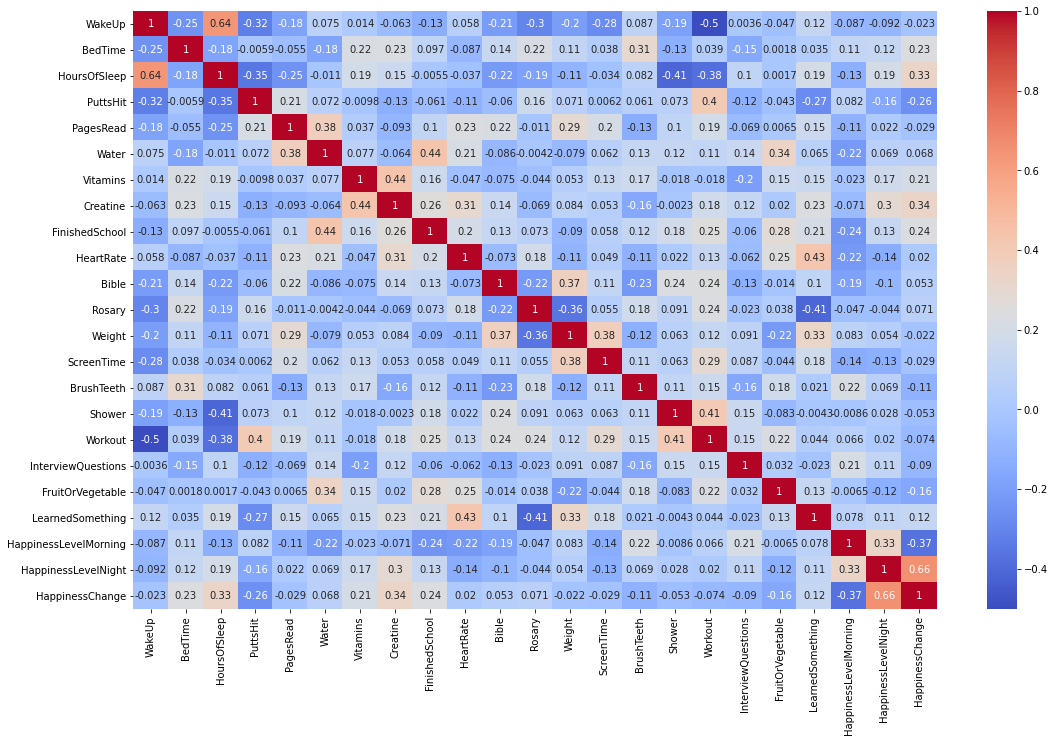

In [221]:
goals_num_correlations = goals_num.corr()
plt.figure(figsize=(18,11))
sns.heatmap(goals_num_correlations, annot = True, cmap = "coolwarm" );

In [222]:
goals_mean = goals_num.mean()

In [223]:
goals_mean = pd.DataFrame(goals_mean)
goals_mean = goals_mean.rename(columns = {0 : 'Average'})
goals_mean

,Average
WakeUp,6.501591
BedTime,10.121591
HoursOfSleep,6.469773
PuttsHit,37.954545
PagesRead,37.477273
Water,48.545455
Vitamins,0.363636
Creatine,0.295455
FinishedSchool,0.863636
HeartRate,58.022727


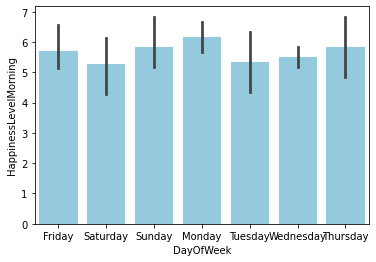

In [224]:
sns.barplot( x = goals.DayOfWeek, y = goals.HappinessLevelMorning , color="skyblue");

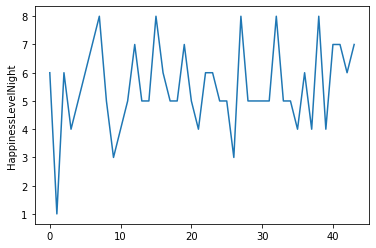

In [225]:
sns.lineplot(data = goals.HappinessLevelNight);

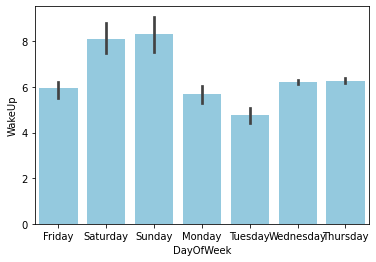

In [226]:
sns.barplot( x = goals.DayOfWeek, y = goals.WakeUp , color="skyblue");

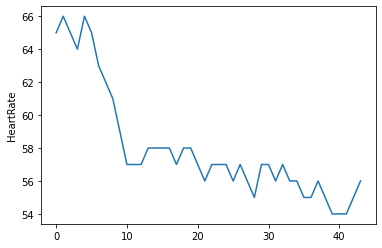

In [227]:
sns.lineplot(data = goals.HeartRate);

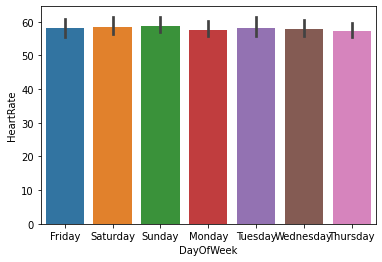

In [228]:
sns.barplot( x = goals.DayOfWeek, y = goals.HeartRate);

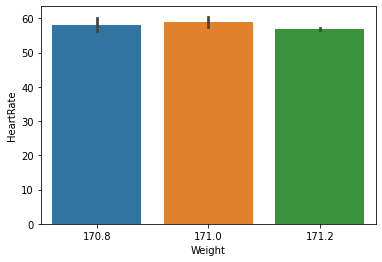

In [229]:
sns.barplot( x = goals.Weight, y = goals.HeartRate);

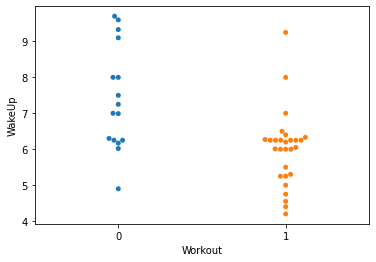

In [230]:
sns.swarmplot(x = goals.Workout, y = goals.WakeUp);

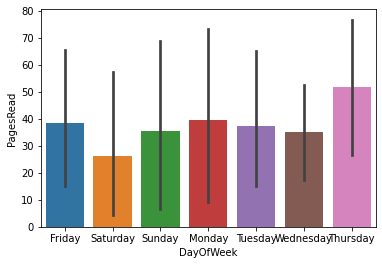

In [231]:
sns.barplot( x = goals.DayOfWeek, y = goals.PagesRead);